In [30]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from market import IntegratedMarketModel

In [31]:
from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

In [32]:
n_firms = 10 
n_consumers = 500
n_chars = 2
T = 1
s = 100

In [33]:
model = IntegratedMarketModel(
        n_firms, 
        n_consumers, 
        n_chars, 
        T, 
        seed=s
    )
model.demand_side_optimisation()


In [34]:
vp1 = model.v_p[:,0]
print(vp1.shape)
price1 = model.prices[:,0]

e=0 


market_shares, all_probs, mean_indirect_utility = model.compute_share(vp1, price1, e)
J_true = model.construct_Jacobian(all_probs, vp1)
print(J_true)
print(all_probs)

(500,)
[[-0.0260214   0.00056317  0.00056376  0.00045487  0.00053991  0.00052836
   0.00063761  0.00059104  0.00048273  0.00052324]
 [ 0.00056317 -0.02771868  0.0005946   0.00048045  0.00056998  0.00055621
   0.00067304  0.00062403  0.00050994  0.00055121]
 [ 0.00056376  0.0005946  -0.02724821  0.00048005  0.00057001  0.00055892
   0.00067321  0.00062393  0.00050942  0.00055322]
 [ 0.00045487  0.00048045  0.00048005 -0.02277787  0.0004607   0.00044801
   0.00054391  0.00050447  0.00041249  0.00044438]
 [ 0.00053991  0.00056998  0.00057001  0.0004607  -0.02664953  0.00053302
   0.0006453   0.00059834  0.00048899  0.0005283 ]
 [ 0.00052836  0.00055621  0.00055892  0.00044801  0.00053302 -0.02454789
   0.00062982  0.00058315  0.0004752   0.00052152]
 [ 0.00063761  0.00067304  0.00067321  0.00054391  0.0006453   0.00062982
  -0.03127121  0.00070648  0.00057729  0.00062414]
 [ 0.00059104  0.00062403  0.00062393  0.00050447  0.00059834  0.00058315
   0.00070648 -0.02919746  0.00053546  0.000

In [35]:
vp2 = np.random.normal(0, 1, n_consumers)
J_approx = model.construct_Jacobian(all_probs, vp2)
print(J_approx)


J_true_flat = J_true.flatten()
J_approx_flat = J_approx.flatten()


# Compare the matrices element-wise with a tolerance of 0.2
comparison = np.allclose(J_true, J_approx, atol=1e-03)

# Print the result
if comparison:
    print("The matrices are approximately the same.")
else:
    print("The matrices are different.")


[[-0.02866745  0.00066865  0.00067361  0.00053758  0.0006406   0.00064047
   0.00075722  0.00070058  0.00057001  0.00063079]
 [ 0.00066865 -0.03038798  0.00070783  0.00056563  0.0006737   0.00067186
   0.00079627  0.00073687  0.00059981  0.00066214]
 [ 0.00067361  0.00070783 -0.03011673  0.00056887  0.0006781   0.00067916
   0.00080161  0.00074153  0.00060314  0.0006686 ]
 [ 0.00053758  0.00056563  0.00056887 -0.02483179  0.000542    0.00053882
   0.00064051  0.0005929   0.00048289  0.00053145]
 [ 0.0006406   0.0006737   0.0006781   0.000542   -0.02919228  0.00064343
   0.00076292  0.00070604  0.00057477  0.0006342 ]
 [ 0.00064047  0.00067186  0.00067916  0.00053882  0.00064343 -0.02764211
   0.00076096  0.00070331  0.00057105  0.00063904]
 [ 0.00075722  0.00079627  0.00080161  0.00064051  0.00076292  0.00076096
  -0.0342859   0.00083444  0.00067922  0.00074991]
 [ 0.00070058  0.00073687  0.00074153  0.0005929   0.00070604  0.00070331
   0.00083444 -0.03193863  0.00062876  0.00069333]


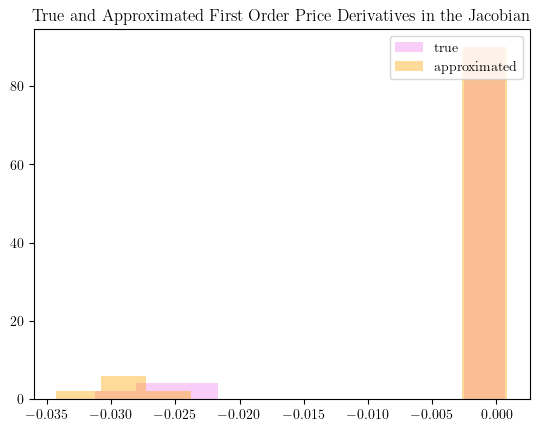

In [36]:
plt.hist(J_true_flat, 
         bins=10,
         alpha=0.4, 
         label='true',
         color='violet') # customized color parameter
  
plt.hist(J_approx_flat,
         bins=10, 
         alpha=0.4,
         label='approximated',
         color='orange')

plt.title('True and Approximated First Order Price Derivatives in the Jacobian')
plt.legend(loc='upper right')
plt.show()

In [37]:
wage = 15 
theta_0 = 1
theta_L = 0.3 
theta_K = 0.7
q= np.ones(2)

productivity_shocks = np.ones((2,2))
capital = np.ones((2,2))

t = 0

MC = (wage*(1/theta_L))*((q)/(np.exp(theta_0 + productivity_shocks[:,t])*
              capital[:,t]**theta_K))**((1/theta_L)-1) *(1/(np.exp(theta_0 + productivity_shocks[:,t])*
              capital[:,t]**theta_K))

print(MC)

[0.06363169 0.06363169]


In [38]:
x = np.array([[1, 2, 3], [4, 5, 6]])
print(x.shape)

(2, 3)


In [39]:
n_cons = 3
n_firms = 3
product_chars = np.array(([1, 3, 3], [1, 2, 2], [5, 5, 5]))
mu = -4
omega = 0.5
v_p = np.array([4, 5, 6])
price = np.ones(n_firms)
beta = np.array([1, 0.5, 0.5])

mean_indirect_utility = product_chars@beta - mu*price

mean_indirect_utility_for_utility = np.repeat(mean_indirect_utility, n_cons, axis=0)

price_r = np.reshape(price, (1, n_firms))
alpha_i = np.reshape((omega*v_p), (n_cons, 1))



random_coeff = np.ravel((alpha_i@price_r).T)



u = mean_indirect_utility_for_utility  + random_coeff + e
print(u)

u_r = np.reshape(u, (n_firms, n_cons))
print(u_r)
sum_u = np.sum(np.exp(u_r), axis=0)
print(sum_u)

all_probs = np.exp(u_r)/(1 + sum_u)
print(all_probs)
market_shares = (np.sum(all_probs, axis=1))/n_cons
# # market_shares = np.sum(all_probs, axis=1)/self.n_consumers
p1 = all_probs[0, :]
print(p1)



[10.  10.5 11.   9.   9.5 10.  16.  16.5 17. ]
[[10.  10.5 11. ]
 [ 9.   9.5 10. ]
 [16.  16.5 17. ]]
[ 8916240.07023025 14700394.65845743 24236853.3610853 ]
[[2.47037576e-03 2.47037587e-03 2.47037593e-03]
 [9.08800453e-04 9.08800494e-04 9.08800518e-04]
 [9.96620712e-01 9.96620756e-01 9.96620782e-01]]
[0.00247038 0.00247038 0.00247038]


In [40]:
J = np.zeros((n_firms, n_firms))
alphas = mu + omega*v_p
print(alphas)
print(all_probs)
for i in range(J.shape[0]):
    print('i', i)
    p1 = all_probs[i, :]
    for j in range(J.shape[1]):
        print('j', j)
        if i == j:
            J[i, j] = np.sum(alphas * p1 - alphas * (p1 ** 2))/(n_cons)
        else: 
            p2 = all_probs[j, :]
            print(p1)
            print(p2)
            print('check shape', -alphas * p1 * p2 )
            J[i, j] = np.sum((-alphas * p1 * p2))/(n_cons)

print(J)


[-2.  -1.5 -1. ]
[[2.47037576e-03 2.47037587e-03 2.47037593e-03]
 [9.08800453e-04 9.08800494e-04 9.08800518e-04]
 [9.96620712e-01 9.96620756e-01 9.96620782e-01]]
i 0
j 0
j 1
[0.00247038 0.00247038 0.00247038]
[0.0009088 0.0009088 0.0009088]
check shape [4.49015722e-06 3.36761821e-06 2.24507893e-06]
j 2
[0.00247038 0.00247038 0.00247038]
[0.99662071 0.99662076 0.99662078]
check shape [0.00492406 0.00369304 0.00246203]
i 1
j 0
[0.0009088 0.0009088 0.0009088]
[0.00247038 0.00247038 0.00247038]
check shape [4.49015722e-06 3.36761821e-06 2.24507893e-06]
j 1
j 2
[0.0009088 0.0009088 0.0009088]
[0.99662071 0.99662076 0.99662078]
check shape [0.00181146 0.00135859 0.00090573]
i 2
j 0
[0.99662071 0.99662076 0.99662078]
[0.00247038 0.00247038 0.00247038]
check shape [0.00492406 0.00369304 0.00246203]
j 1
[0.99662071 0.99662076 0.99662078]
[0.0009088 0.0009088 0.0009088]
check shape [0.00181146 0.00135859 0.00090573]
j 2
[[-3.69640962e-03  3.36761812e-06  3.69304169e-03]
 [ 3.36761812e-06 -1.3619

In [41]:
a1, a2, a0, s0 = model.get_alphas()
print(a0)
print(s0)

-1.6820276496988864
0.33979778797685584


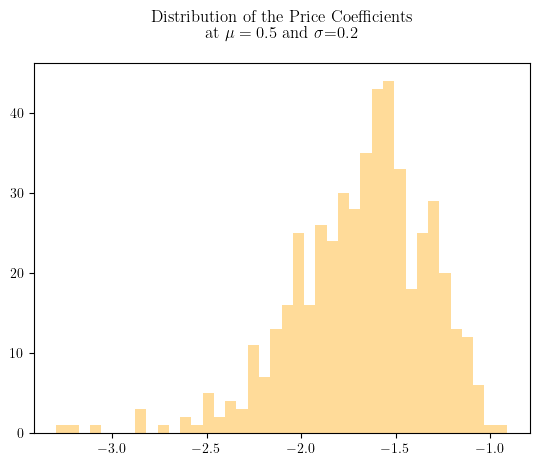

In [45]:
# plt.hist(a1, 
#          bins=10,
#          alpha=0.4, 
#          label='true',
#          color='violet') # customized color parameter
  
plt.hist(a2,
         bins=40, 
         alpha=0.4,
        #  label='Price Coeffi',
         color='orange')

plt.title('Distribution of the Price Coefficients \n at $\mu = 0.5$ and $\sigma$=0.2 \n')
# plt.legend(loc='upper right')
plt.show()